# <font color=#800000>410821312 張宸瑋</font>
## Homework 2 (Morphological Filter)
1. Input image from gear_tooth.png.
2. The objective is to detect missing teeth using a sequence of morphological filters.
3. Optional: Design a set of structure elements: <b>gear_body</b>, <b>sampling_ring_spacer</b>, <b>sampling_ring_width</b>, <b>tip_spacing</b>, <b>defect_cue</b>
4. Apply morphological filters using the structure elements to generate the figures (e), (f), (g), (h )<br>
(e) opening it with structure element <b>gear_body</b> to get rid of the teeth, dilating that with structure element <b>sampling_ring_spacer</b> to bring it out to the base of the teeth, dilating that with the structure element <b>sampling_ring_width</b> to bring the next image out to the tip of the teeth, and subtracting the last two results to get a ring that just fits over the teeth.<br>
(f) AND it with the original image to produce an image of just the teeth.<br>
(g) dilating the teeth image with the structure element <b>tip_spacing</b> produces the solid ring image which has spaces in the solid ring wherever there are defects in the teeth.
(h ) subtracting it from the sampling ring leave<br>s only the defects, which are dilated by structure element <b>defect_cue</b>.<br>
5. Mark the defected gears using <b>red rectangles</b> on the output images.
6. Write a simple report in a separate cell.
7. Upload your Jupyter code file (*.ipynb)


In [2]:
import cv2
import numpy as np

#read image 
img = cv2.imread('gear_tooth.png', cv2.IMREAD_GRAYSCALE)
originalpic = cv2.imread('gear_tooth.png')

#x,y point starting from the black conner
x = 48
y = 26
w = 205
h = 121

#crop the picture(get rid of the white space)
img = img[y:y+h, x:x+w]
originalpic = originalpic[y:y+h, x:x+w]

#thresholding
retval, img_a = cv2.threshold(img, 225, 255, cv2.THRESH_BINARY)

#for (a)(b)(c)(d), code given by professor
kernel_dot = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel_hole = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
kernel_hole_e = cv2.erode(kernel_hole, kernel_dot, iterations=1)
kernel_hole_ring = kernel_hole - kernel_hole_e

img_b = cv2.erode(img_a, kernel_hole_ring, iterations=1)
img_c = cv2.dilate(img_b, kernel_hole, iterations=1)
img_d = cv2.bitwise_or(img, img_c)

cv2.imshow('(a)', img_a)
cv2.imshow('(b)', img_b)
cv2.imshow('(c)', img_c)
cv2.imshow('(d)', img_d)

#gear_body structure elements, apply it to the gear image with no hole(img_d) to get rid of the teeth
gear_body = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (55,55))
img1 = cv2.morphologyEx(img_d, cv2.MORPH_OPEN, gear_body)


# sampling_ring_spacer structure elements, dilating the previous img1 to the base of the teeth
sampling_ring_spacer = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
img2 = cv2.dilate(img1, sampling_ring_spacer)


# sampling_ring_width structure elements, dilating the previous img2 to the tip of the teeth
sampling_ring_width= cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
img3 = cv2.dilate(img2, sampling_ring_width)

# subtracting img3 and img2 to get the ring
img_e = img3 - img2
cv2.imshow("(e)",img_e)

#AND img_e with the original image to show an image of just the teeth
img_f = cv2.bitwise_and(img, img_e)
cv2.imshow("(f)",img_f)

#tip_spacing structure elements, apply it to img_f (just the teeth)
#by  dilating img_e we are able to get the ring with hole represents the defects in the teeth
tip_spacing = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 6))
img_g = cv2.dilate(img_f, tip_spacing)
#using threshold to removed noise(there are some gray parts in img_g)
retval, img_g  = cv2.threshold(img_g , 110, 256, cv2.THRESH_BINARY)
cv2.imshow("(g)",img_g)

# subtracting it from the sampling ring(img_e), so we get get only the defects
# defect_cue structure elements, dilating it with the subtract image and then use bitwise_or with the img_g to get the final result
img4 = img_e - img_g
defect_cue = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13))
img_h = cv2.dilate(img4, defect_cue)
result = cv2.bitwise_or(img_h  ,img_g)
#using threshold to removed noise(gray parts in result)
retval, result  = cv2.threshold(result , 254, 255, cv2.THRESH_BINARY)
cv2.imshow("(h)",result)

#Mark the defected gears using red rectangle
retval, img_h  = cv2.threshold(img_h , 254, 255, cv2.THRESH_BINARY)
height, width = img_h.shape
#using connectedComponents to find the center points, and draw red rectangles based on center points on the original picture
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_h, connectivity=8)
#draw red rectangle
cv2.rectangle(originalpic, (int(centroids[1][0])-5, int(centroids[1][1])-5), (int(centroids[1][0])+5, int(centroids[1][1])+5), (0,0,255), 1)
cv2.rectangle(originalpic, (int(centroids[2][0])-5, int(centroids[2][1])-5), (int(centroids[2][0])+5, int(centroids[2][1])+5), (0,0,255), 1)
cv2.imshow("output with red rectangles",originalpic)

cv2.waitKey()
cv2.destroyAllWindows()

## output example
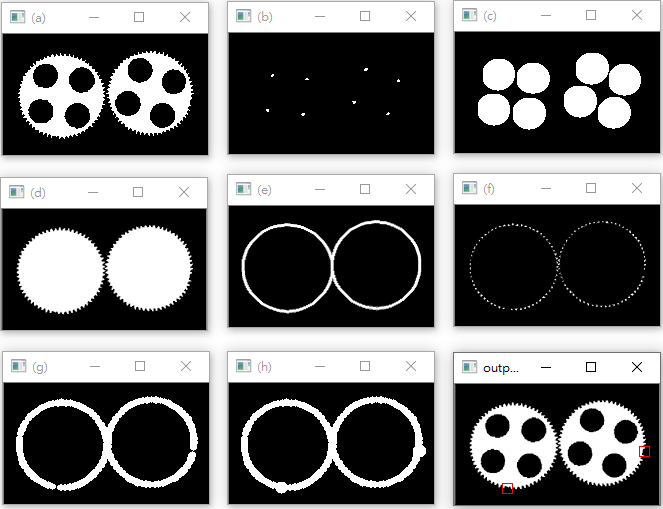

## <font color=#800000>Report</font>
### Crop the gear_tooth picture
- Since the picture given by professor has white space around the actual gear picture we're about to use, so I crop the picture to get rid of the white space and leave only the black part as the folloing picture show
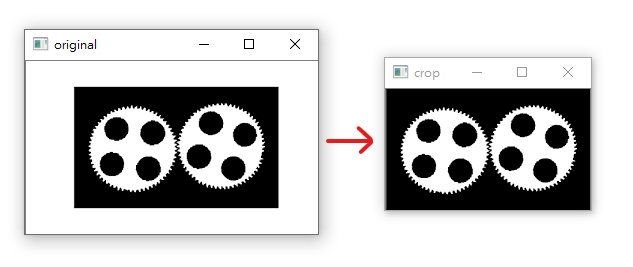

###  Image (e)
- For generating image e(white ring), we need three structure elements to make it work. The first structure element is gear_body, applying it to the img_d (already be done in professor's code), we are able to get rid of the teeth, make two white circle with no hole in it<br>
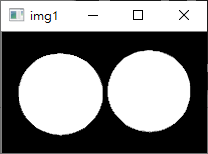<br>
- After getting the gear body with no teeth, now we apply the second structure element, which is sampling_ring_spacer. Using sampling_ring_spacer, we are able to dilate the previous picture to the base of the teeth as the following picture below<br>
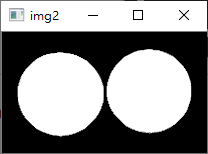<br>
- Now we apply the third structure element, which is sampling_ring_width, applying it on the previous image to dilate it to the tip of the teeth<br>
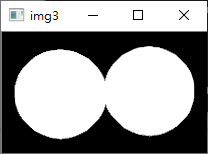<br>
- Last, subtracting two previous image to get the ring we need(image e)<br>
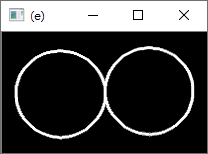<br>

### Image (f)
- To get the image of just the teeth, we simplify just follow the instruction, AND image e with the origianl image(image a)<br>
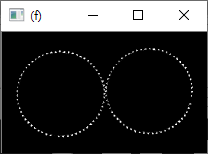<br>

### Image (g)
- To make the solid ring image which has spaces in the solid ring wherever there are defects in the teeth. We need to use another structure element, which is tip_spacing. Applying tip_spacing to dilate image f (just the teeth) so we can get the ring with space of defect in teeth.
- After applying tip_spacing, there are some gray part in the image, so I used threshold to removed noise.
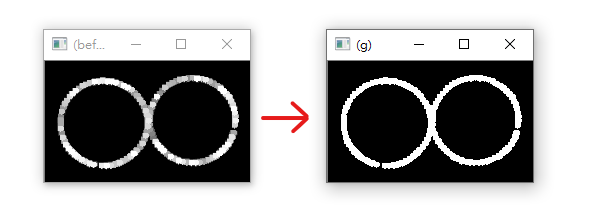

### Image (h)
- For image h, we need to substract image e with the previous image g first, we named the substract image "img4" here. After getting substract image, we need to apply the last structure element ,which is defect_cue. Applyong defect_cue on img4 to dilate it and then use bitwise_or with the img_g the get the result.
- Since the result image has a lot of noise that we dont need , so I used threshold to removed noise again, turing pixel value under 254 into black and rest in white to get the final image.
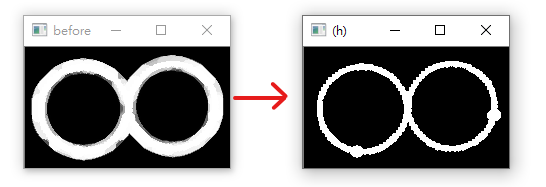

### Mark the defected gears using red rectangles
- While making image h, we apply defect_cue on img4. Now we simply use threshold to remove noise to get two dot which indicate the position of the defects in teeth<br>
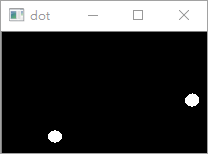<br>
- Then we use cv2.connectedComponentsWithStats to get the center points(x,y) of those two dot. Based on the x,y coordinate, we are able the mark the defected gears using red rectangles and show the output.<br>
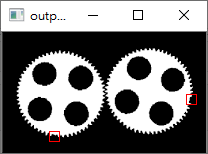<br>



